<a href="https://colab.research.google.com/github/RajTejani61/Intern/blob/main/Deep%20Learning/CNN/Tensorflow/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copy kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Optional: secure the file

In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 95% 1.01G/1.06G [00:07<00:01, 38.7MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s] 


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_file.extractall('/content')
zip_file.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input

In [ ]:
# generators
train = tf.keras.utils.image_dataset_from_directory(directory='/content/dogs_vs_cats/train', labels='inferred', label_mode='int', batch_size=32, image_size=(256, 256))
test = tf.keras.utils.image_dataset_from_directory(directory='/content/dogs_vs_cats/test', labels='inferred', label_mode='int', batch_size=32, image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalize

def normalize_img(image, label):
  image = tf.cast(image/255. , tf.float16)
  return image, label

train_ds = train.map(normalize_img)
test_ds = test.map(normalize_img)

In [ ]:
model = Sequential()

model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(6, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,872,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,882,097 (30.07 MB)

 Trainable params: 7,882,053 (30.07 MB)

 Non-trainable params: 44 (176.00 B)

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.5433 - loss: 1.7412 - val_accuracy: 0.6438 - val_loss: 0.6350
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.6230 - loss: 0.6384 - val_accuracy: 0.7226 - val_loss: 0.5382
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6907 - loss: 0.5458 - val_accuracy: 0.7608 - val_loss: 0.5332
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7412 - loss: 0.4712 - val_accuracy: 0.7366 - val_loss: 0.6046
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7996 - loss: 0.3975 - val_accuracy: 0.7714 - val_loss: 0.6041
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8328 - loss: 0.3400 - val_accuracy: 0.7574 - val_loss: 0.6134
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8498 - loss: 0.3102 - val_accuracy: 0.7506 - val_loss: 0.7499
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.8719 - loss: 0.2699 - 

In [ ]:
loss, acc = model.evaluate(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7655 - loss: 0.7308


In [ ]:
print(f"LOSS : {loss}, ACCURACY : {acc}")

LOSS : 0.7215826511383057, ACCURACY : 0.7649999856948853


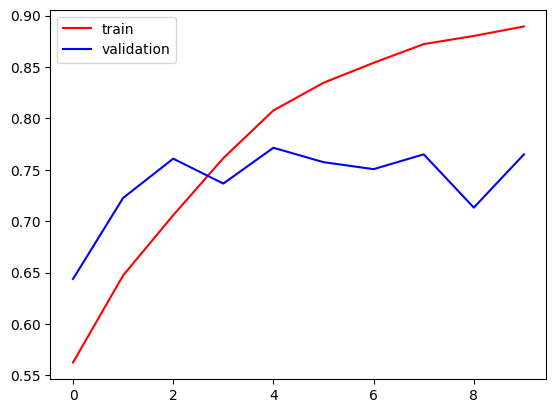

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

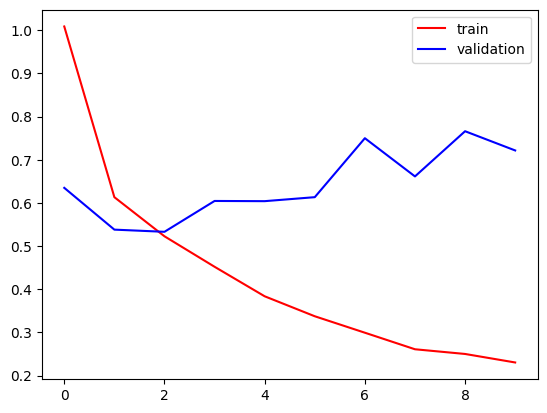

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

Predicting Dog img

In [ ]:
test_img = cv2.imread('/content/dog.jpeg')

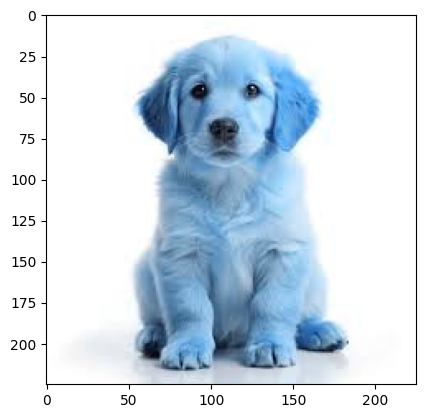

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(225, 225, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3)) # convert 1 batch into tensor

In [ ]:
model.predict(test_input) # 1 dog, 0 cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


array([[1.]], dtype=float32)

Predicting cat img

In [ ]:
cat_img = cv2.imread('/content/cat.jpeg')

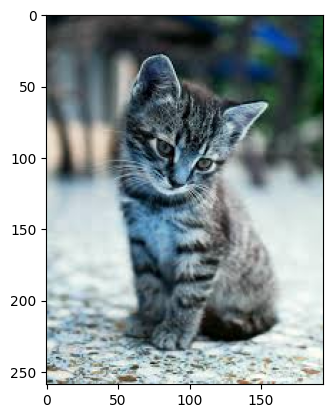

In [ ]:
plt.imshow(cat_img)

In [ ]:
cat_img = cv2.resize(cat_img, (256, 256))

In [ ]:
cat_input = cat_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(cat_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.]], dtype=float32)

In [ ]:
def fibonacci():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a+b

fib = fibonacci()
for _ in range(10):
    print(next(fib))


0
1
1
2
3
5
8
13
21
34
